# Статистическая проверка непараметрических гипотез. Критерий Пирсона. Критерий Колмогорова
Подготовили студенты группы **153503** **Шкарубский М.А**. и **Лаппо К.С**.

Источники:
1. [И. П. Костенко, Выравнивание статистических рядов. Проверка правдоподобия
гипотез, Матем. обр., 2008, выпуск 2, 50–71](https://www.mathnet.ru/links/7ff4e9240bd69389f655a231338fdf4f/mo80.pdf) 
2. [Видео по критерию Хи-квадрат (Пирсона)](https://www.youtube.com/watch?v=hvBHyDm4biM)
3. [Лекция по критерию Колмогорова-Смирнова](https://datalearning.ru/index.php/textbook?cid=1&mid=4&topic=0)
4. [Проверка статистических гипотез](http://www.machinelearning.ru/wiki/index.php?title=%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7)
5. [Критерий согласия Пирсона](http://mathprofi.ru/kriteriy_soglasiya.html)

## Подготовка

In [6]:
pip install ipywidgets

  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.2-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl (215 kB)
Note: you may need to restart the kernel to use updated packages.


In [108]:
import numpy as np
from scipy.stats import kstest, chi2_contingency, uniform, norm
from scipy.special import gamma
import plotly.graph_objs as go
import ipywidgets as widgets
from ipywidgets import interact, IntSlider
from IPython.display import display, Math, Markdown

In [17]:
RANDOM_SEED: int = 42

In [18]:
np.random.seed(RANDOM_SEED)
np.seterr(all='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

### Таблицы критических точек для соответствующих критериев

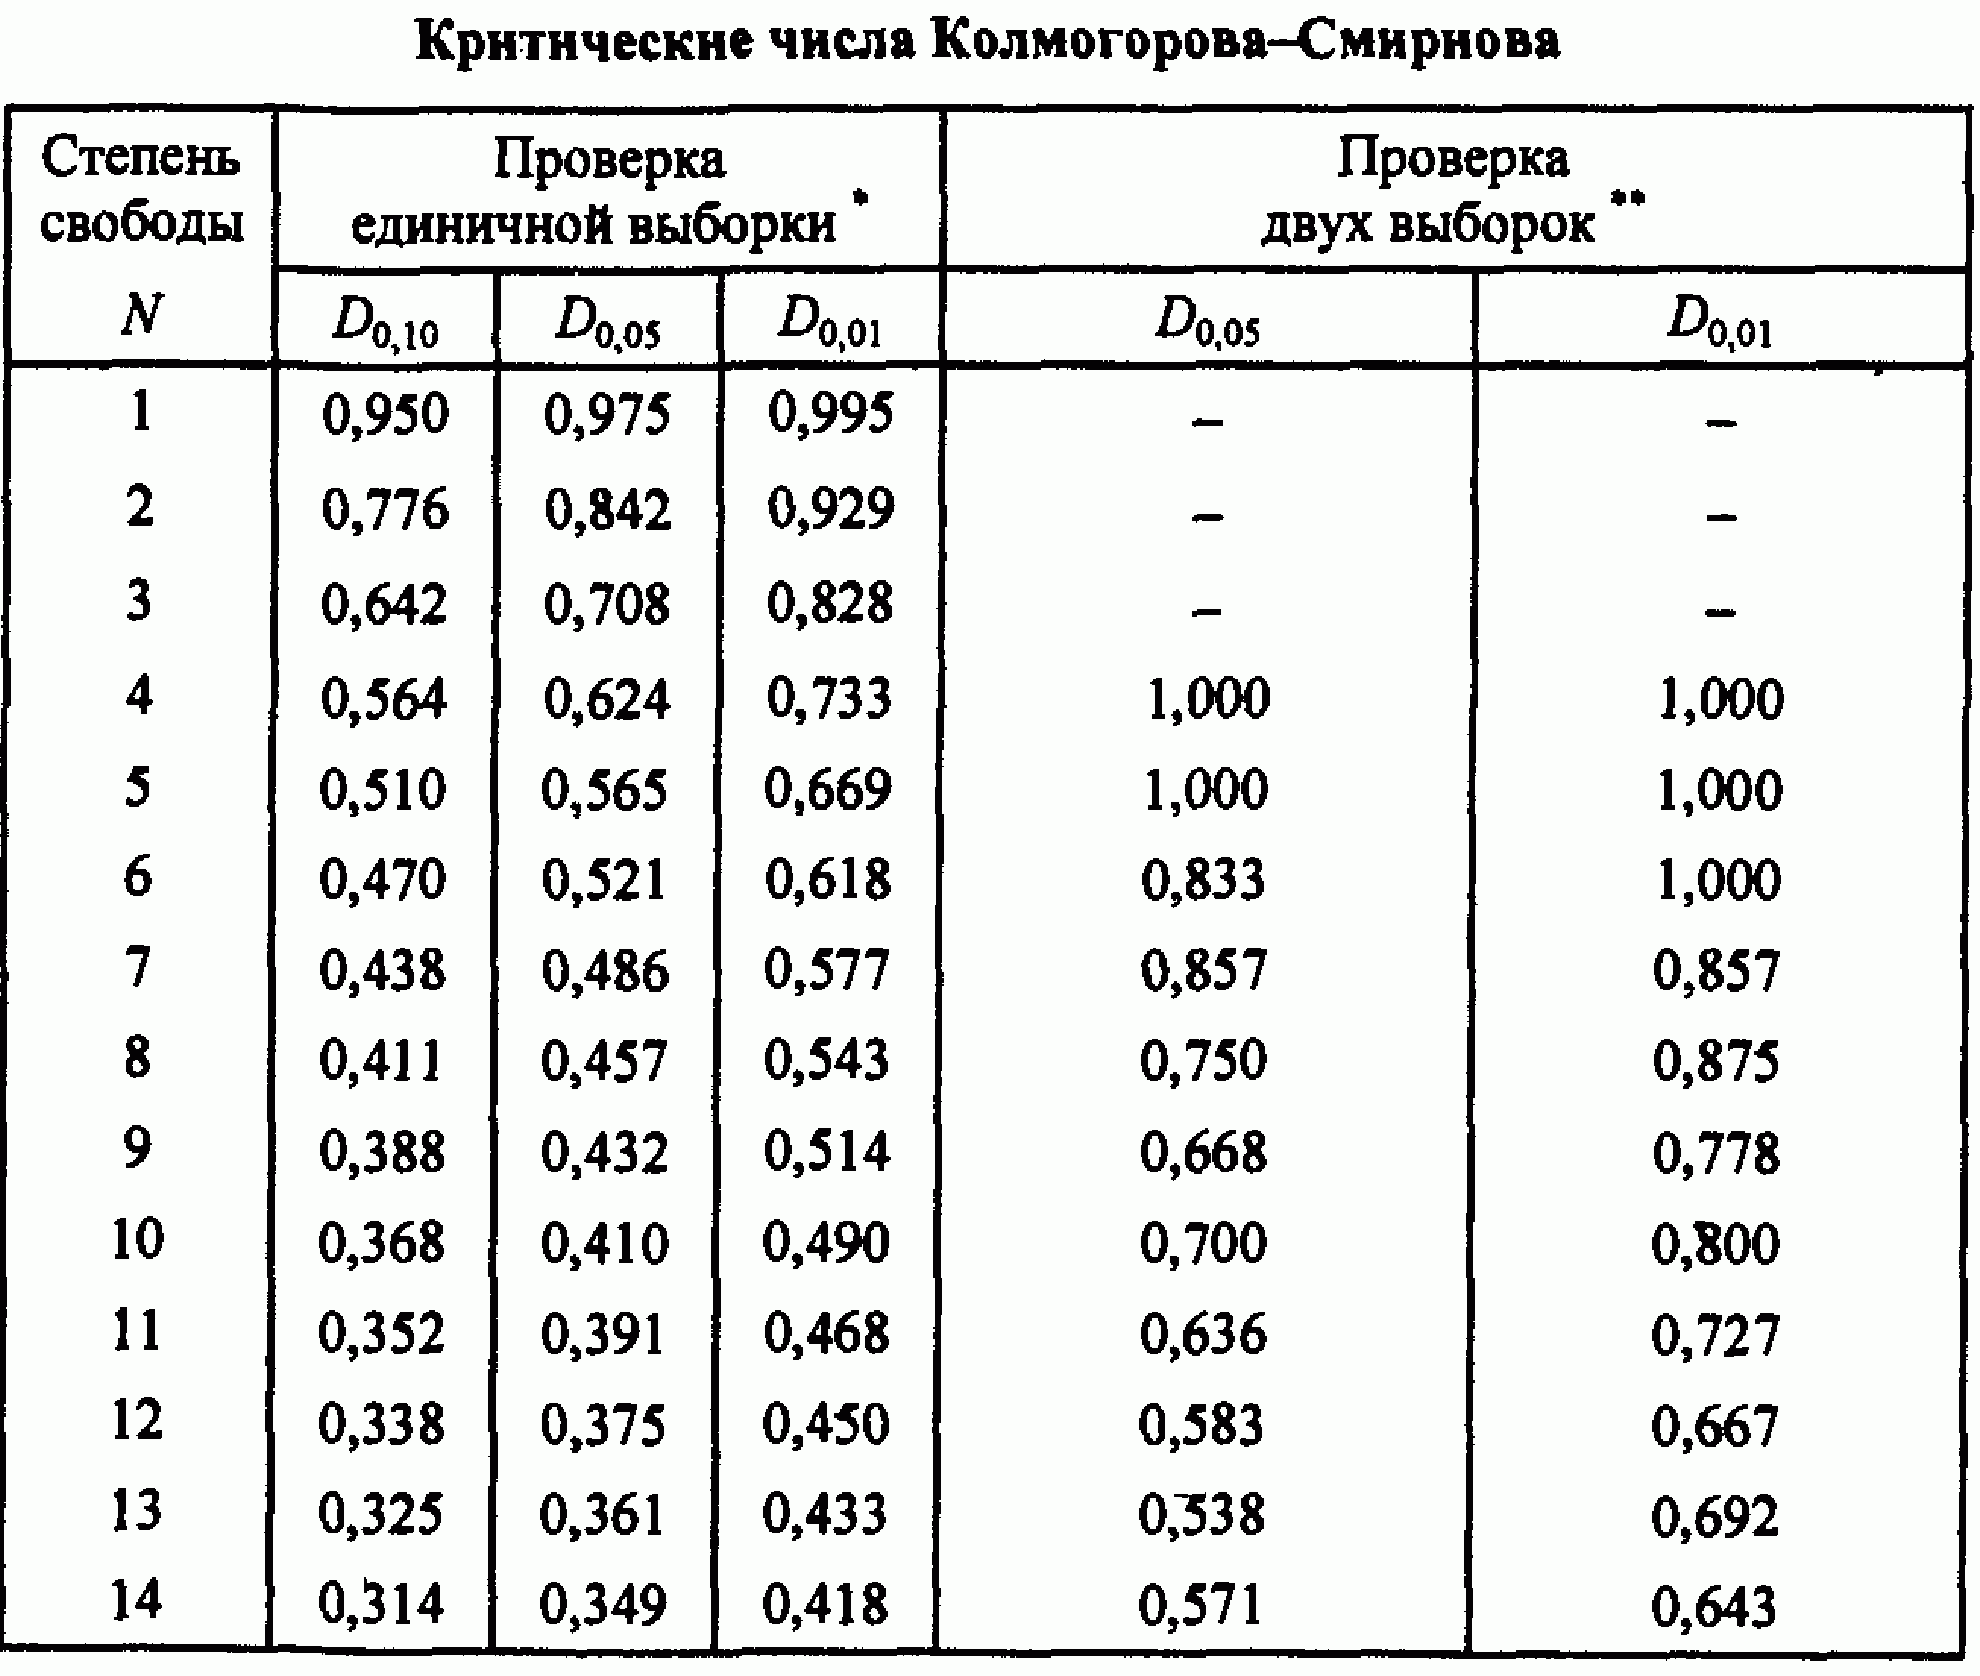
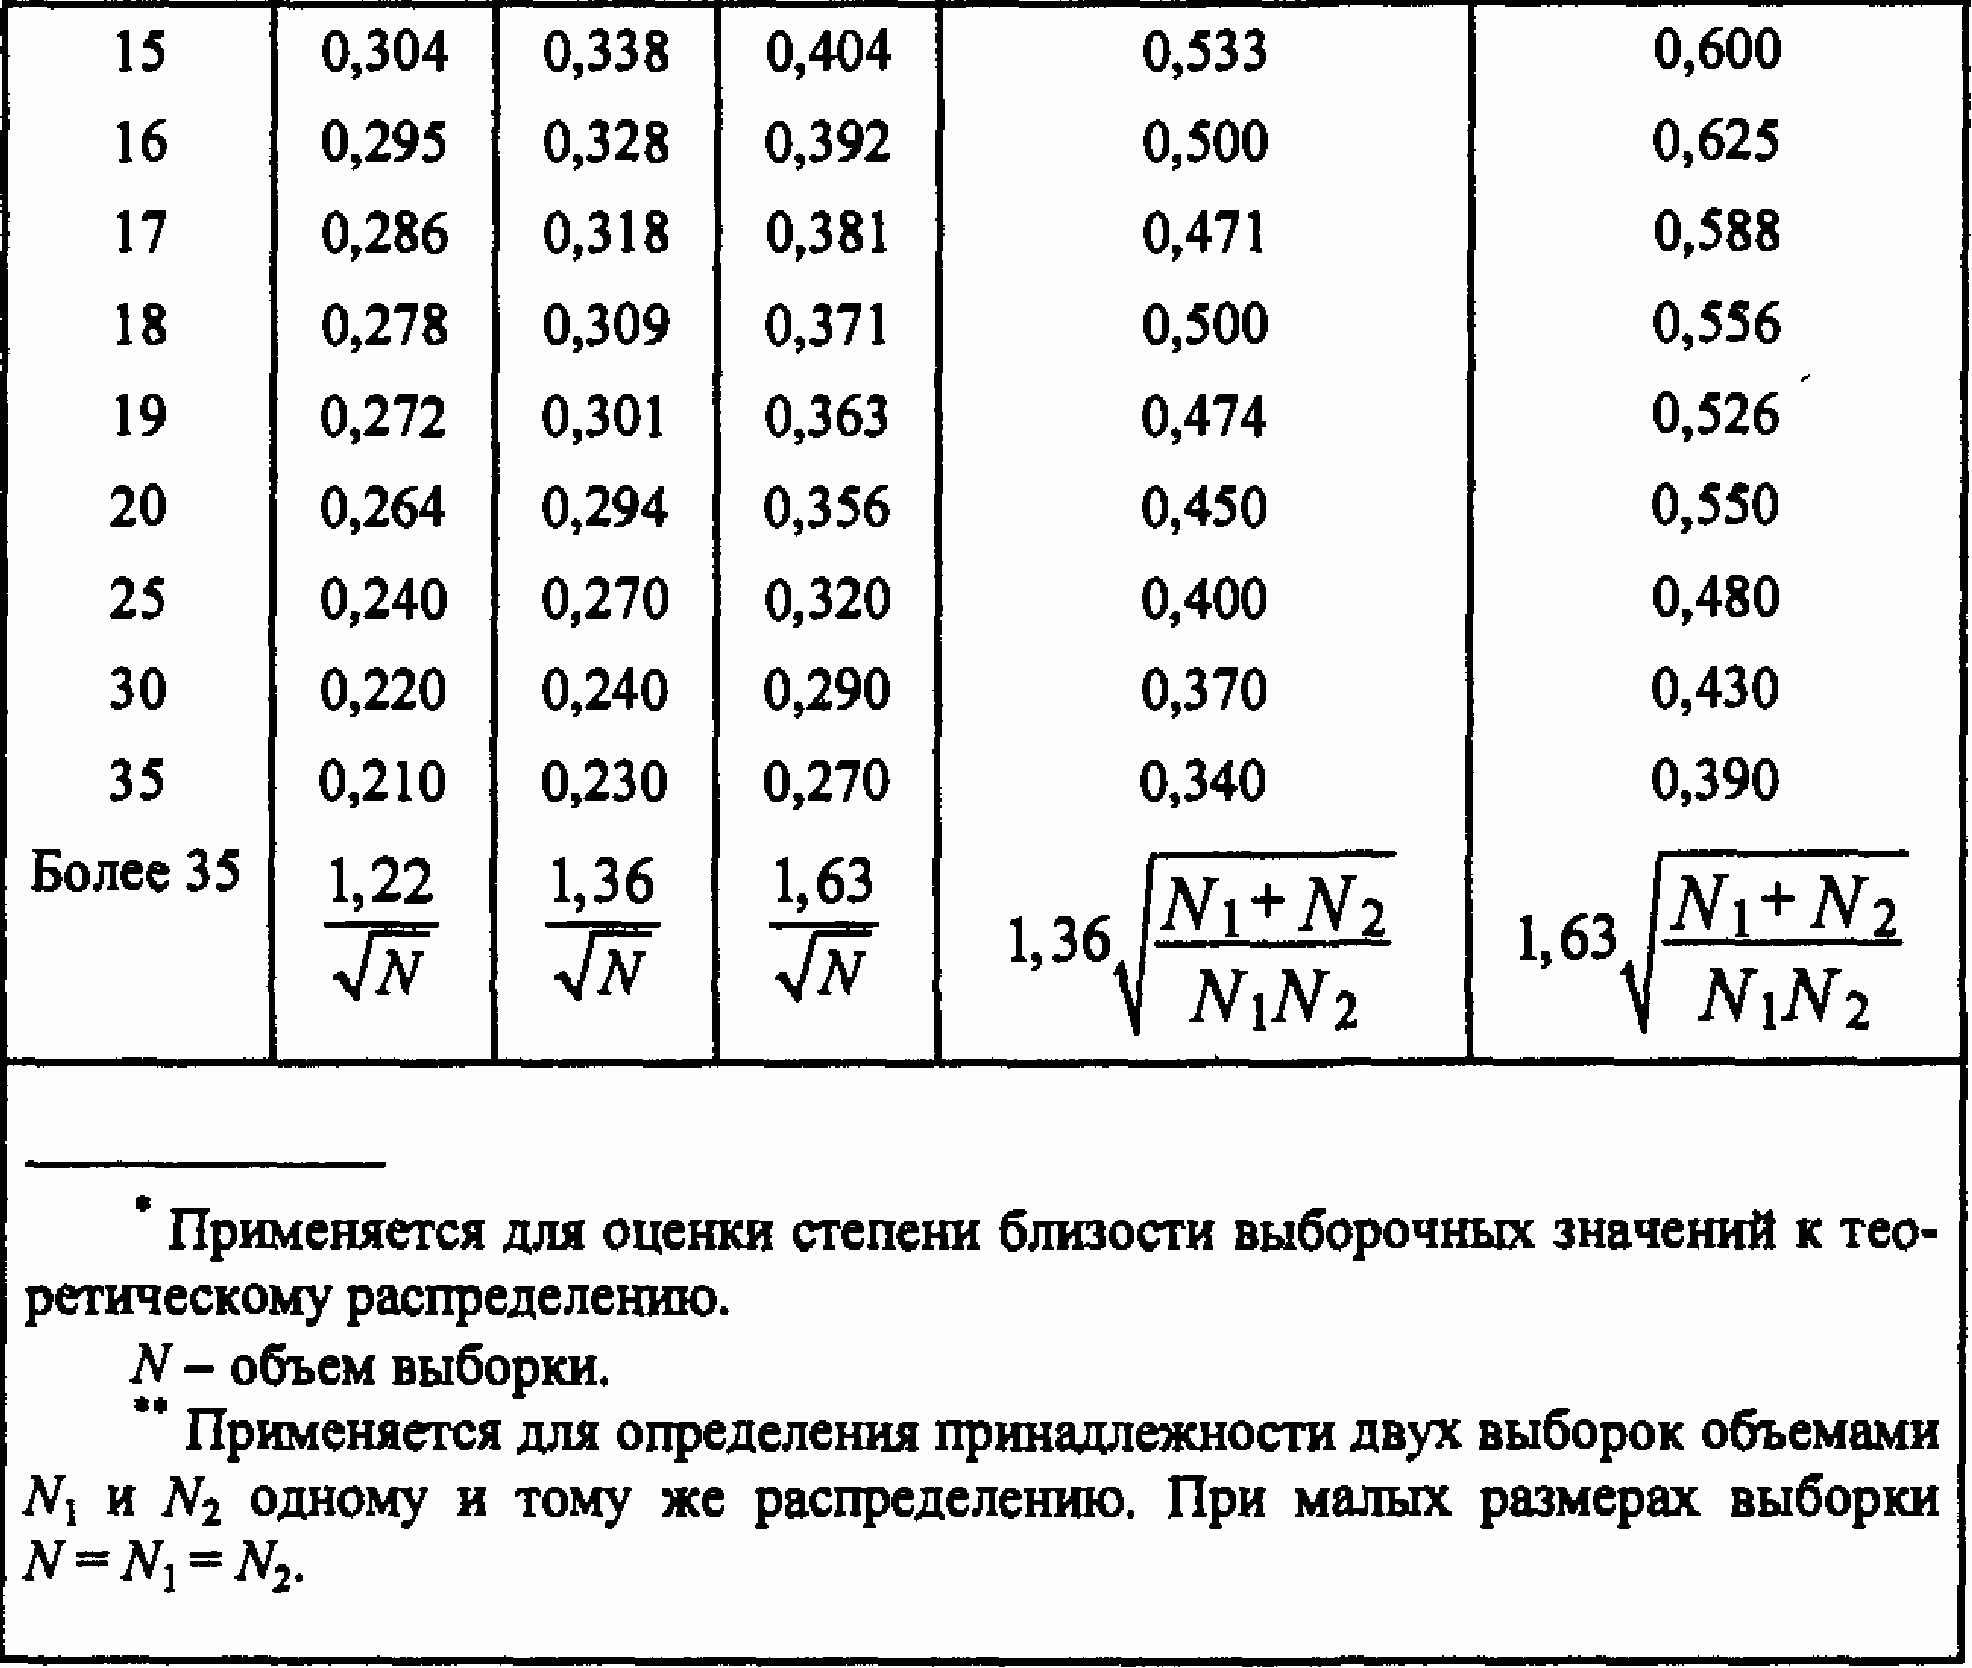

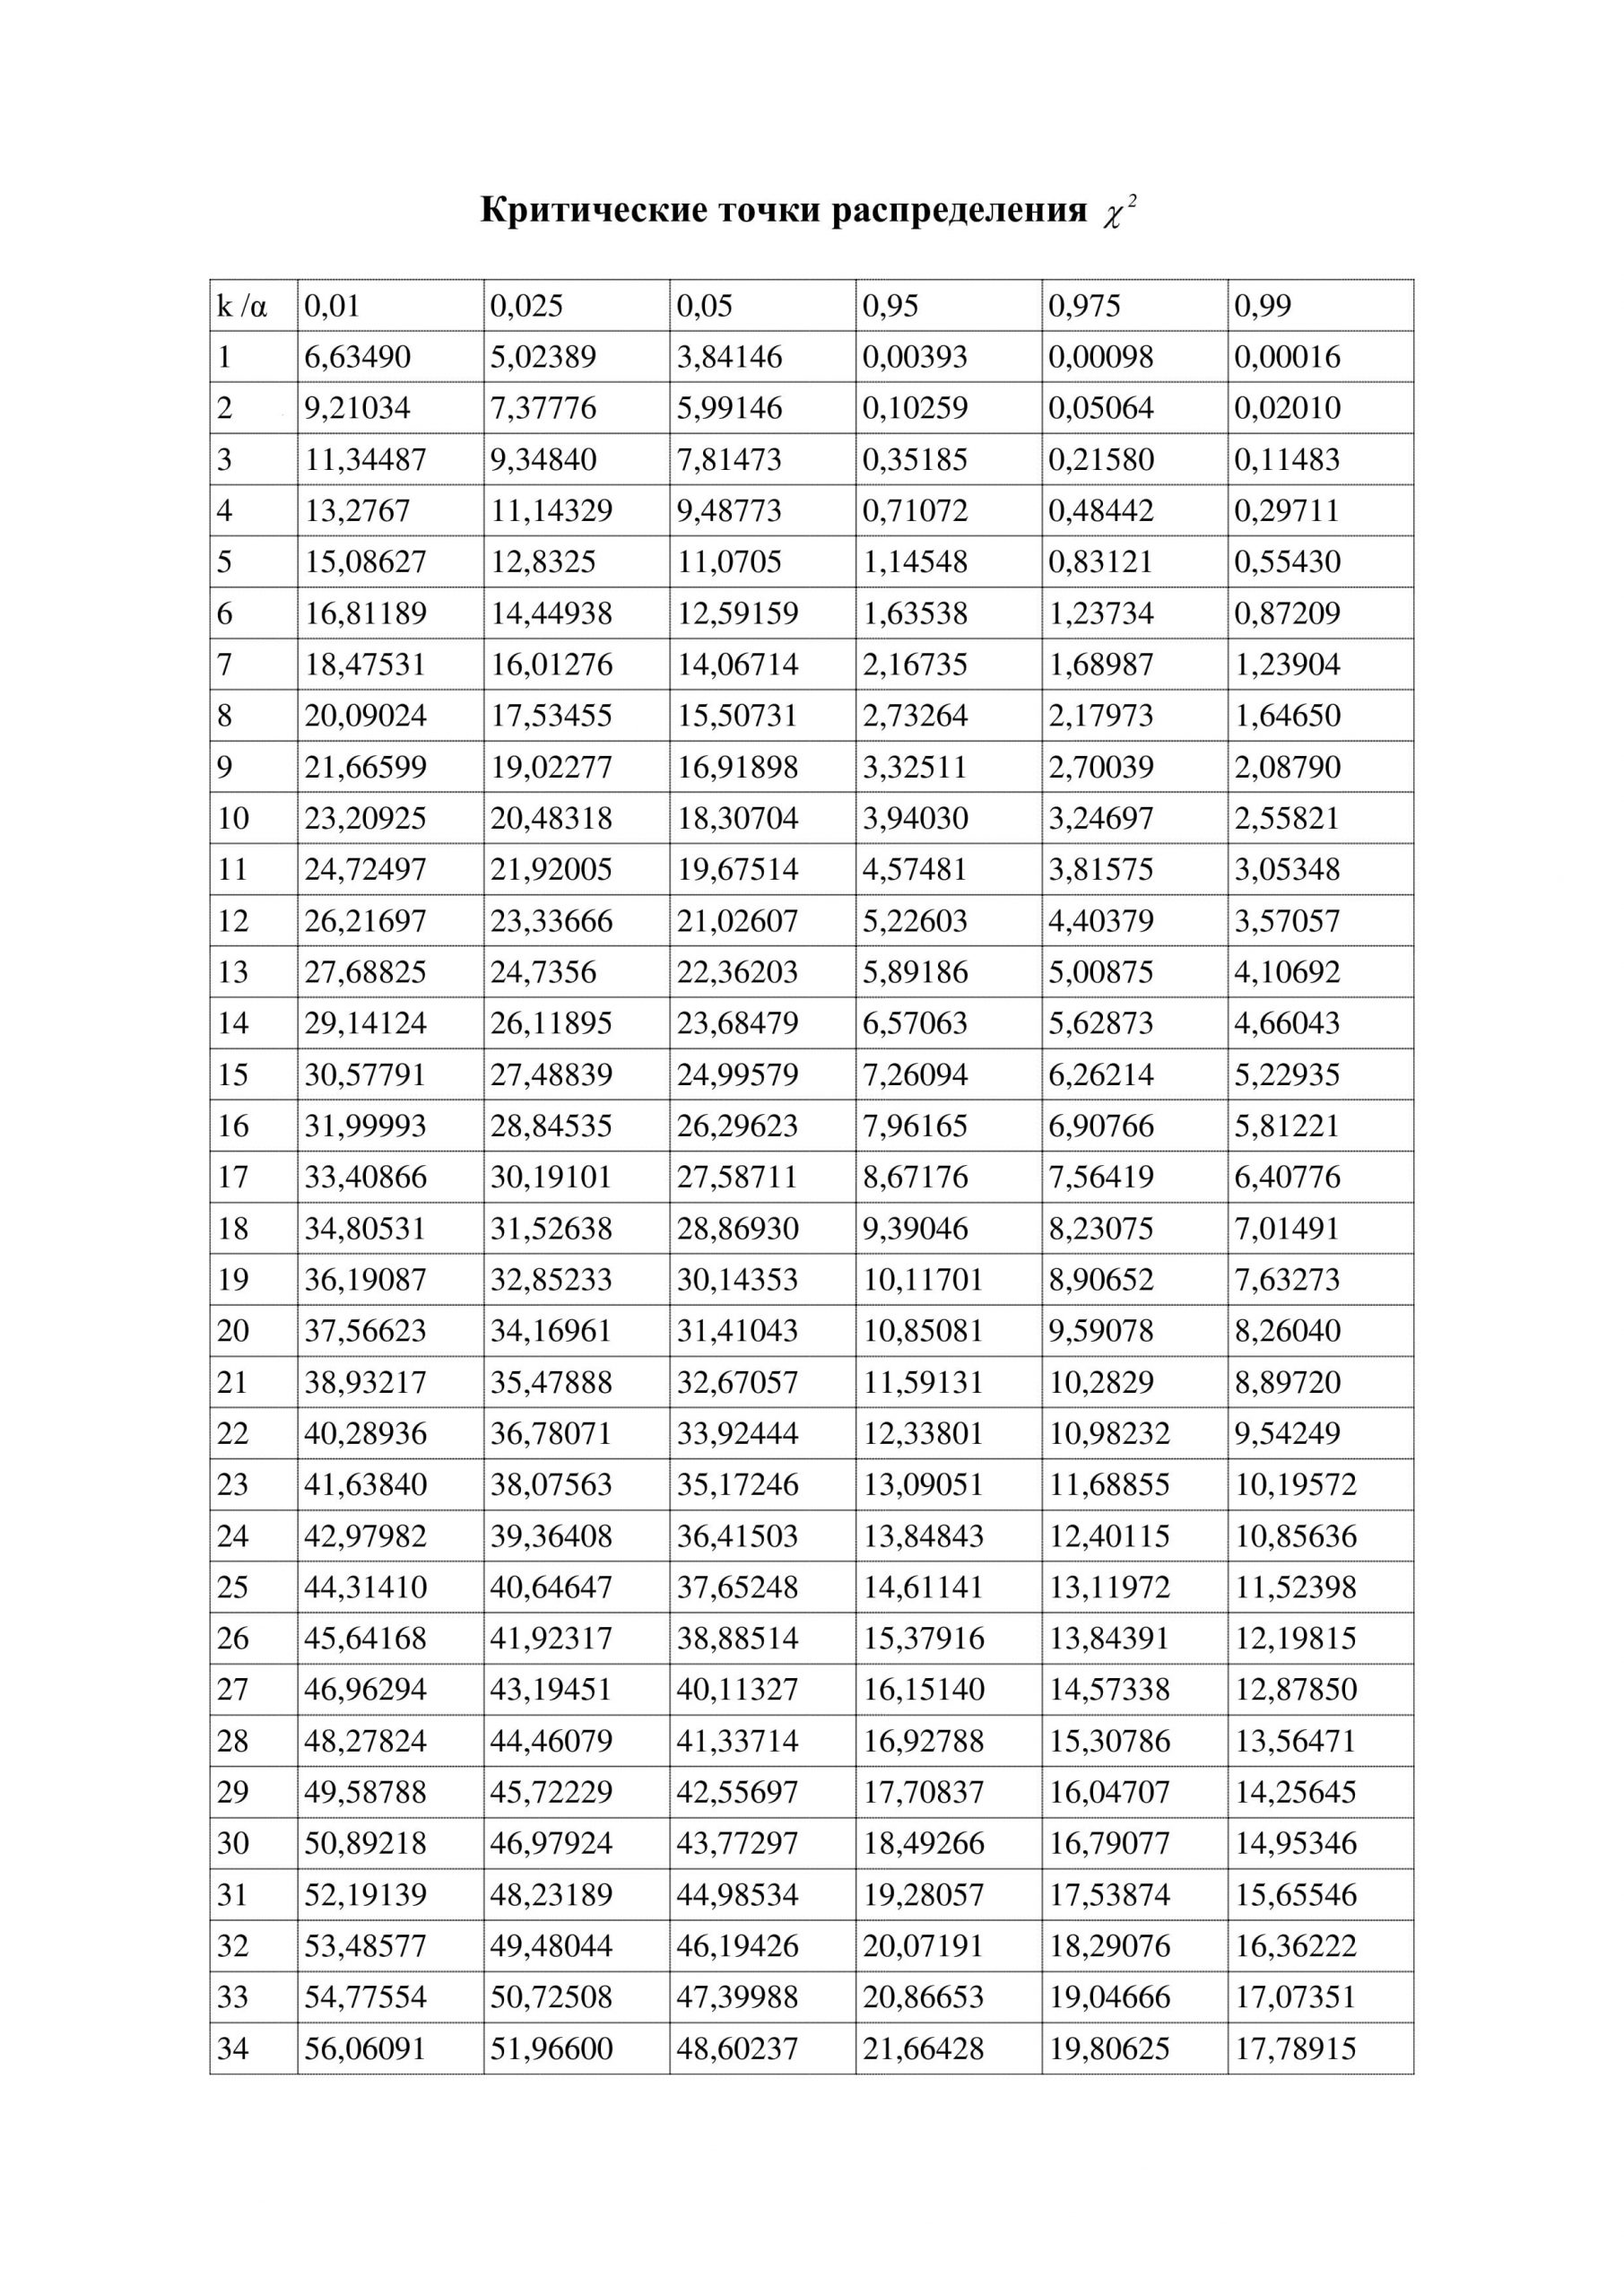

## Теория

### Статистическая гипотеза
**Статистическая гипотеза** — это определённое предположение о распределении вероятностей, лежащем в основе наблюдаемой выборки данных. Статистическая гипотеза называется простой, если она определяет единственный закон распределения, в противном случае статистическая гипотеза называется сложной и может быть представлена как множество простых статистических гипотез. Например, гипотеза о том, что распределение вероятностей случайной величины, значения которой наблюдаются в данном эксперименте, является нормальным с математическим ожиданием $\mu\gt\mu_0$ и дисперсией $\sigma^2=\sigma^2_0$ есть сложная гипотеза, составленная из простых гипотез.

**Проверка статистической гипотезы** — это процесс принятия решения о том, противоречит ли рассматриваемая статистическая гипотеза наблюдаемой выборке данных, а **статистический тест** или **статистический критерий** — строгое математическое правило, по которому принимается или отвергается статистическая гипотеза

### Методика проверки статистических гипотез на основе фиксированного уровня значимости. Ошибки первого и второго рода

Пусть задана случайная выборка $x^m = (x_1,\ldots,x_m)$ — последовательность $m$ объектов из множества $X$. Предполагается, что на множестве $X$ существует некоторая неизвестная вероятностная мера $\mathbb{P}$. Методика состоит в следующем.

На первом шаге формулируется нулевая гипотеза $H_0$ о распределении вероятностей на множестве $X$. Гипотеза формулируется исходя из требований прикладной задачи. Чаще всего рассматриваются две гипотезы — _основная_ (или _нулевая_) $H_0$ и _альтернативная_ $H_1$. Иногда альтернатива не формулируется в явном виде; тогда предполагается, что $H_1$ означает «не $H_0$». Иногда рассматривается сразу несколько альтернатив. В математической статистике хорошо изучено несколько десятков «наиболее часто встречающихся» типов гипотез, и известны ещё сотни специальных вариантов и разновидностей. Вместе с тем, с нулевой гипотезой ассоциируют понятия ошибок первого и второго рода. 

**Ошибка первого рода** или «ложная тревога» (англ. type I error, $\alpha$ error, false positive, FP) — когда нулевая гипотеза отвергается, хотя на самом деле она верна. Вероятность ошибки первого рода:
$$\alpha = \mathbb{P}\left\{ T\in\Omega_\alpha | H_0 \right\}.$$
**Ошибка второго рода** или «пропуск цели» (англ. type II error, $\beta$ error, false negative, FN) — когда нулевая гипотеза принимается, хотя на самом деле она не верна. Вероятность ошибки второго рода:
$$\beta(H_1) = \mathbb{P}\left\{ T\notin\Omega_\alpha | H_1 \right\}.$$
$$
\begin{array}{|c|c|c|}
    \hline
    \text{Верная \\ Принятая} & H_0 & H_1 \\ \hline
    H_0 & \text{True positive} & \text{False negative} \\ \hline
    H_1 & \text{False positive} & \text{True negative} \\ \hline
\end{array}
$$
Ошибки первого и второго родов также находят свое применение в машинном обучении (англ. machine learning, ML), а именно в задачах классификации (не только в бинарной). Они позволяют строить на их основе более сложные метрики, такие как _precision_, _recall_, _ROC-AUC_, _PR-AUC_, _F1_ и т.д. 

На втором шаге задаётся некоторая статистика (функция выборки) $T:\: X^m \to \mathbb{R}$, для которой в условиях справедливости гипотезы $H_0$ выводится функция распределения $F(T)$ и/или плотность распределения $p(T)$. Вопрос о том, какую статистику надо взять для проверки той или иной гипотезы, часто не имеет однозначного ответа. Есть целый ряд требований, которым должна удовлетворять «хорошая» статистика $T$. Вывод функции распределения $F(T)$ при заданных $H_0$ и $T$ является строгой математической задачей, которая решается методами теории вероятностей; в справочниках приводятся готовые формулы для $F(T)$; в статистических пакетах имеются готовые вычислительные процедуры.

Третий шаг фиксирует уровень значимости — допустимую для данной задачи вероятность ошибки первого рода, то есть того, что гипотеза на самом деле верна, но будет отвергнута процедурой проверки. Это должно быть достаточно малое число $\alpha \in [0,1]$. На практике часто полагают $\alpha=0.05$.

На четвертом шаге на множестве допустимых значений статистики $T$ выделяется критическое множество $\Omega_\alpha$ наименее вероятных значений статистики $T$, такое, что 
$\mathbb{P}\left\{T \in \Omega_\alpha | H_0\right\} = \alpha$. Вычисление границ критического множества как функции от уровня значимости $\alpha$ является строгой математической задачей, которая в большинстве практических случаев имеет готовое простое решение.

Пятый шаг. Собственно статистический тест (статистический критерий) заключается в проверке условия:
- если $T(X^m)\in\Omega_\alpha$, то делается вывод «данные противоречат нулевой гипотезе при уровне значимости $\alpha$». Гипотеза отвергается.
- если $T(X^m)\notin\Omega_\alpha$, то делается вывод «данные не противоречат нулевой гипотезе при уровне значимости $\alpha»$. Гипотеза принимается.

### Достигаемый уровень значимости
Широкое распространение методики фиксированного уровня значимости было вызвано сложностью вычисления многих статистических критериев в докомпьютерную эпоху. Чаще всего использовались таблицы, в которых для некоторых априорных уровней значимости были выписаны критические значения. В настоящее время результаты проверки гипотез чаще представляют с помощью достигаемого уровня значимости.

Достигаемый уровень значимости (пи-величина, англ. p-value) — это наименьшая величина уровня значимости, при которой нулевая гипотеза отвергается для данного значения статистики критерия T:

$$p(T) = \min \{ \alpha:\: T\in\Omega_\alpha \},$$
где $\Omega_\alpha$ — критическая область критерия. Следует отметить, что существуют три типа критических областей – левосторонняя, правосторонняя и двусторонняя.

Другая интерпретация: достигаемый уровень значимости $p(T)$ — это вероятность при справедливости нулевой гипотезы получить значение статистики, такое же или ещё более экстремальное, чем $T$.

Если достигаемый уровень значимости достаточно мал (близок к нулю), то нулевая гипотеза отвергается. В частности, его можно сравнивать с фиксированным уровнем значимости; тогда альтернативная методика будет эквивалентна классической.

### Критерий согласия Колмогорова-Смирнова
Классический критерий Колмогорова (иногда говорят Колмогорова-Смирнова) предназначен для проверки простых гипотез о принадлежности анализируемой выборки некоторому полностью известному закону распределения. Алгоритм в этом случае следующий.

Пусть $X_n$ - выборка независимых одинаково распределённых случайных величин, $F_n(x)$ - эмпирическая функция распределения, $F(x)$ - некоторая "истинная" функция распределения с известными параметрами. Статистика критерия определяется выражением:

$$
D_n=\sup_x |F_n(x)-F(x)|.
$$

В качестве нулевой гипотезы выбираем гипотезу о том, что эмпирическая выборка подчиняется теоретическому распределению $F(x)$. За альтернативную гипотезу принимаем "не $H_0$". Тогда по теореме Колмогорова при справедливости проверяемой гипотезы:

$$
\forall t>0: \quad \lim_{n \to \infty}P(\sqrt{n} D_n \leq t)=K(t)
$$

Отсюда имеем, что гипотеза $H_0$ отвергается, если статистика $\sqrt{n}D_n\!$ превышает квантиль распределения $K_\alpha$ заданного уровня значимости $\alpha$, и принимается в противном случае.
Если проверяемая гипотеза справедлива, предельным распределением статистики Колмогорова является распределение Колмогорова $K(t)$.

Если ${\displaystyle \alpha}$ достаточно близко к $1$, то ${\displaystyle K_{\alpha }}$ можно приблизительно рассчитать по формуле:
$$
{\displaystyle K_{\alpha }\approx {\sqrt {-{\frac {1}{2}}\ln {\frac {1-\alpha }{2}}}}.}
$$

**Пояснение о распределении Колмогорова**. Случайная величина $X$ имеет распределение Колмогорова, если её функция распределения $F_X(x)$ имеет вид:
$$
{
    \displaystyle F_X(x) = K(x) =
    {
        \begin{cases}
            \sum \limits_{k=-\infty }^{\infty}(-1)^{k}e^{-2k^{2}x^{2}}, & x>0; \\
            0, & x \leqslant 0. 
        \end{cases}
    }
}
$$

Обозначается $X \sim K$.

Достоинствами критерия Колмогорова по сравнению с критерием Пирсона являются возможность его применения при очень маленьких объемах выборки, более высокая «чувствительность», а следовательно, меньшая трудоемкость вычислений. Недостатком является то, что эмпирическая функция распределения должна быть построена по несгруппированным выборочным данным, что затруднительно при больших объемах выборки. 

Также следует отметить, что критерий Колмогорова можно применять только в случае, когда гипотетическое распределение известно заранее из каких-либо теоретических соображений.
Такой случай сравнительно редко встречается на практике. Обычно из теоретических соображений известен только общий вид функции, а входящие в нее числовые параметры определяются по данному статистическому материалу. При применении критерия Пирсона это обстоятельство учитывается соответствующим уменьшением числа степеней свободы распределения. Критерий Колмогорова такого согласования не предусматривает. Если все же применять этот критерий в тех случаях, когда параметры теоретического распределения определяются по статистическим данным, критерий дает заведомо заниженные значения $D_n$; поэтому в ряде случаев есть риск принять как правдоподобную гипотезу, которая в действительности плохо согласуется с опытными данными.

### Критерий согласия Хи-квадрат (Пирсона)
Пусть $\set{x1 , x2 , ..., x_n}$ – выборка из некоторой генеральной совокупности $X$, а $F(x)$ – предполагаемая функция теоретического распределения. На основании выборки построим интервальный ряд ${\Delta i , n_i}$, $i=1,2,...,m$, где n$_i$ – число элементов выборки, попавших в интервал $\Delta i$ = $\left[a_i,a_{i+1}\right)$. 

Как и в случае любого другого критерия согласия, задача состоит в том, чтобы придумать некоторую меру расхождения между некоторыми распределениями и затем оценить вероятность расхождения.

Для каждого данного интервала вычислим теоретические вероятности $p_i$ попадания в него случайной величины $X$:
$$
p_i = P\left\{X \in \Delta_i \right\} = F\left(a_{i+1}\right) − F\left(a_i\right).
$$

Числа $n_i$ и $np_i$ называются эмпирической и теоретической частотами соответственно. Доказано, что при $n \to \infty$ статистика 
$$
t = \sum_{i=1}^{n}{\frac{\left(n_i - np_i\right)^2}{np_i}}
$$
имеет распраделение $\chi_k^2$ с $k = m - r - 1$ степенями свободы, где $m$ – число интервалов вариационного ряда; $r$ – число параметров теоретического распределения, вычисленных по экспериментальным данным. Основная гипотеза $H_0$ состоит в том, что функцией распределения случайной величины $X$ является выбранная теоретическая функция. 

Для заданного уровня доверия $\alpha$ по таблицам распределения $\chi_k^2$ находим критическое значение:
$$
\chi_{k, кр}^2: P\left\{\chi_k^2 \lt \chi_{k,кр}^2\right\} = \alpha.
$$

Гипотеза $H_0$ о согласии $F_n(x)$ с распределением $F(x)$ принимается, если $t \lt \chi_{k, кр}^2 $.

**Пояснение о распределении $\chi^2$**. Распределе́ние хи-квадрат с $k$ степенями свободы представляет собой распределение суммы квадратов $k$ независимых стандартных нормальных случайных величин. Пусть $X_1, \ldots, X_n$ — совместно независимые стандартные нормальные случайные величины, то есть: $X_i \sim N(0,1)$. Тогда случайная величина
$$
Y = X_1^2 + \cdots + X_n^2
$$

**Пояснение о весах**. Веса $np_i$ вводятся для того, чтобы учесть значимость каждой разности
для меры расхождения. Что значит «значимость»? Если эмпиреческая вероятность мала, то малое от неё отклонение теоретической вероятности может быть очень значимым для меры общего расхождения распределений, так как может быть вызвано не случайными причинами. В то время, как то же самое отклонение $р^*_і$ от большей вероятности $р_і$ составит небольшой процент от неё и, значит, вполне объяснимо случайными факторами. Поэтому для малых отклонений следует увеличить вес, а для больших — уменьшить.

### Интерактивный график распределения Хи-квадрат с варьируемым числом степеней свободы

In [146]:
def plot_chi_square_distribution(k):
    x: np.ndarray = np.linspace(0, 50, 1000)
    y: np.ndarray = np.exp(-x / 2) * x ** (k / 2 - 1) / (2 ** (k / 2) * gamma(k / 2))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'Chi-Square Distribution (k={k})'))
    fig.update_layout(title=f'Chi-Square Distribution (Degrees of Freedom = {k})',
                      xaxis_title='X',
                      yaxis_title='Probability Density')
    fig.show()

interact(plot_chi_square_distribution, k=IntSlider(min=1, max=30, step=1, value=1))

interactive(children=(IntSlider(value=1, description='k', max=30, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_chi_square_distribution(k)>

## Практика. Критерий Колмогорова-Смирнова

### Задача 1 (пример)
#### Условие
Используя критерий Колмогорова, проверить на уровне значимости $\alpha=0.1$ гипотезу о том, что выборка $\set{0.90; 0.56; 0.05; 0.21; 0.97; 0.80; 0.04; 0.12; 0.73; 0.49}$ является выборкой наблюдений равномерно распределённой случайной величины $X \sim R(0, 1)$.

#### Решение

Сформулируем основную и альтернативную статистические гипотезы:
$$
\begin{cases}
H_0: F_X(x) = R(x), \\
H_1: F_X(x)\neq R(x).
\end{cases}
$$

Предполагаемая функция распределения $R(x)$ имеет вид:
$$
R(x) = 
{
    \begin{cases}
        0, & x < 0, \\
        x, & 0 \leqslant x \leqslant 1, \\
        1, & otherwise.
    \end{cases}
}
$$

Составим вариационный ряд выборки: 
$$
0.04; 0.05; 0.12; 0.21; 0.49; 0.56; 0.73; 0.80; 0.90; 0.97.
$$
Значения ЭФР  в этих точках: 
$$
0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9.
$$
Найдём рассогласования между  и R(x) в этих точках:
$$
0.06; 0.15; 0.18; 0.19; 0.09; 0.06; 0.13; 0.10; 0.10; 0.07.
$$
По определенной выше формуле находим значение $D_n = 0.19$. Выборочное значение статистики критерия $\sqrt{10} * 0.19 \approx 0.6$. Находим квантиль распределения Колмогорова на уровне $1 - \alpha$ ($0.9$ достаточно близко к $1$, чтобы воспользоваться формулой приближения, из которой получаем: $K_{0.9} \approx 1.224$.

Таким образом, оснований считать, что гипотеза $H_0$ не согласуется с экспериментальными данными, нет. Отвергать, что данная выборка могла быть получена из равномерного распределения $R(0, 1)$, нельзя.

#### Проверка

In [149]:
observations = np.array([0.90, 0.56, 0.05, 0.21, 0.97, 0.80, 0.04, 0.12, 0.73, 0.49])
res = kstest(observations, lambda x: uniform.cdf(x, 0, 1))

display(Math(rf"$$D_n = {res.statistic:.2f}$$"))
display(Markdown(f"Исходя из полученного значения p-value, {"отклоняем" if res.pvalue < 0.1 else "не можем отклонить"} гипотезу $H_0$"))

<IPython.core.display.Math object>

Исходя из полученного значения p-value, не можем отклонить гипотезу $H_0$

### Задача 2 (самостоятельное решение)
#### Условие
Проверить на уровне значимости $\alpha = 0.05$ нормальность
распределения выборки $4, 7, 8, 9, 12, 19, 21, 25, 30$, при условии, что
$F(x) = N(10; 5)$.
#### Решение
#### Проверка

In [33]:
# YOUR CODE HERE

### Задача 3 (самостоятельное решение)
#### Условие
Имеются выборочные данные о числе сделок, заключенных фирмой с частными лицами в течение месяца:
- число заключенных сделок $0-10, 10-20, 20-30, 30-40, 40-50$
- число частных лиц $23, 24, 11, 9, 3$
Проверить при уровне значимости $0.05$, используя критерий согласия Колмогорова, гипотезу о нормальном законе распределения.
#### Решение
#### Проверка

In [36]:
# YOUR CODE HERE

## Практика. Критерий Хи-квадрат (Пирсона)

### Задача 1 (пример)
#### Условие
После шлифовки 200 валиков измерены их диаметры и все они оказались заключены в границах 6,68 ÷ 6,83 (см.). Далее произведена группировка: за основной промежуток выбран $\left[6.67;6.85\right]$, он разбит на мелкие промежутки длины $\Delta x_i = 0.02$, подсчитаны частоты $l_i$ попадания диаметров в каждый $\Delta x_i$. 

Составлен группированный ряд:
|$\Delta x_i$|$l_i$|
|-|-|
|$6.67 \div 6.69$|$2$|
|$6.69 \div 6.71$|$15$|
|$6.71 \div 6.73$|$17$|
|$6.73 \div 6.75$|$44$|
|$6.75 \div 6.77$|$52$|
|$6.77 \div 6.79$|$44$|
|$6.79 \div 6.81$|$14$|
|$6.81 \div 6.83$|$11$|
|$6.83 \div 6.85$|$1$|

Используя критерий Пирсона, проверьте на уровне значимости $0.05$ гипотезу о нормальном
распределении диаметра валика. 

Для проверки гипотезы о нормальном распределении диаметра валика используем критерий согласия Пирсона. Сначала найдем оценки параметров нормального распределения.
#### Решение
Параметр $\mu$ (математическое ожидание) оценивается по формуле:
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{k} l_i \cdot m_i
$$
где $l_i$ - частота в интервале, $m_i$ - середина интервала.

Параметр $\sigma$ (стандартное отклонение) оценивается по формуле:
$$
\hat{\sigma} = \sqrt{\frac{1}{n} \sum_{i=1}^{k} l_i \cdot (m_i - \hat{\mu})^2}
$$

Для данной задачи имеем $n=200$.

Вычислим $\hat{\mu}$ и $\hat{\sigma}$:
$$
\begin{align*}
\hat{\mu} &= 
\frac{1}{200} \sum_{i=1}^{k} l_i \cdot m_i \\ 
&= \frac{1}{200} \left(2 \cdot 6.68 + 15 \cdot 6.70 + 17 \cdot 6.72 + 44 \cdot 6.74 + 52 \cdot 6.76 + 44 \cdot 6.78 + 14 \cdot 6.80 + 11 \cdot 6.82 + 1 \cdot 6.84\right) \\
&= 6.758
\end{align*}
$$

$$
\begin{align*}
\hat{\sigma} &= \sqrt{\frac{1}{200} \sum_{i=1}^{k} l_i \cdot (m_i - \hat{\mu})^2} \\
&= \sqrt{\frac{1}{200} (2 \cdot (6.68 - 6.755)^2 + 15 \cdot (6.70 - 6.755)^2 + 17 \cdot (6.72 - 6.755)^2 + 44 \cdot (6.70 - 6.755)^2} \\
&\qquad 52 \cdot (6.76 - 6.755)^2 + 44 \cdot (6.78 - 6.755)^2 +
14 \cdot (6.80 - 6.755)^2 + 11 \cdot (6.82 - 6.755)^2 + \\ 
&\qquad 1 \cdot (6.84 - 6.755)^2) \\
&\approx 0.031
\end{align*}
$$

Проверим полученные значения, используя Python:

In [144]:
delta_xs = np.array([6.67, 6.69, 6.71, 6.73, 6.75, 6.77, 6.79, 6.81, 6.83, 6.85])
delta_x = 0.02
l = np.array([2, 15, 17, 44, 52, 44, 14, 11, 1])

n = np.sum(l)  # Количество наблюдений в выборке
midpoints = delta_xs[:-1] + delta_x / 2  # Середины соотв. интервалов

mu_hat = np.sum(midpoints * l) / n  # Оценка мат. ожидания
sigma_hat = np.sqrt(np.sum(((midpoints - mu_hat) ** 2) * l) / n)  # Оценка станд. отклон.

display(
    Markdown("Получаем следующие значения для оценок мат. ожидания и стандартного отклонения: "),
    Markdown(rf"$$\hat \mu = {mu_hat:.3f}, \hat \sigma = {sigma_hat:.3f}$$"),
    Markdown("Как можно заметить, они совпадают с проведенными выше вычислениями.")
)

Получаем следующие значения для оценок мат. ожидания и стандартного отклонения: 

$$\hat \mu = 6.758, \hat \sigma = 0.031$$

Как можно заметить, они совпадают с проведенными выше вычислениями.

Теперь вычислим значение критерия Пирсона:
$$
t = \sum_{i=1}^{n}{\frac{\left(n_i - np_i\right)^2}{np_i}}.
$$

Для этого нам необходимо сначала найти ожидаемые частоты $np_i$, где $p_i$ - вероятность попадания в интервал. Для нормального распределения вероятность попадания в интервал задается функцией плотности вероятности:

$$
p(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}
$$
 
Для каждого интервала $[a_i, b_i]$, вероятность $p_i$ находится как разность значений функции плотности вероятности в точках $a_i$ и $b_i$, то есть $p_i = F(b_i) - F(a_i)$, где $F(x)$ - функция распределения для нормального распределения.

Для каждого интервала вычислим $np_i$ и найдем значения $(n_i - np_i)^2 / np_i$. После этого просуммируем полученные значения, чтобы найти значение критерия Пирсона.

Для каждого интервала найдем ожидаемые частоты $np_i$, а затем расчитаем $t$ с помощью Python:

In [140]:
cdf = lambda x: norm.cdf(x, loc=mu_hat, scale=sigma_hat)

# Вычисление np_i
nps = n * np.array(list(map(
    lambda i: cdf(i[1]) - cdf(i[0]),
    zip(delta_xs[:-1], delta_xs[1:])
)))

# Значение критерия Хи-квадрат
t = np.sum((l - nps) ** 2 / nps)

display(Markdown(rf"$$\chi^2 = {t:.3f}$$"))

$$\chi^2 = 10.457$$

С помощью вычисленного значения, примем решение о принятии гипотезы $H_0$. Согласно таблице критических точек, соответствующее значение $\chi^2_6 \approx 12.59$ (6, так как количество интервалов равно $9$, количество вычисленных значений равно $2$, что соответствует оценке мат. ожидания и стандартного отклонения). Полученное значение меньше табличного, из чего следует, что гипотеза $H_0$ не может быть отклонена.

#### Проверка

In [145]:
l_exp = n * norm.pdf(midpoints, loc=mu_hat, scale=sigma_hat)
chi_2, p_value = chi2_contingency([l, l_exp])[:2]

display(
    Markdown(rf"$$\chi^2 = {chi_2:.3f}$$"),
    Markdown(rf"$$\text {{p-value}} = {p_value:.3f}$$"),
)

display(Markdown(f"Исходя из полученного значения p-value, {"отклоняем" if p_value < 0.05 else "не можем отклонить"} гипотезу $H_0$"))

$$\chi^2 = 10.597$$

$$\text {p-value} = 0.226$$

Исходя из полученного значения p-value, не можем отклонить гипотезу $H_0$

### Задача 2 (самостоятельное решение)
#### Условие
По результатам выборочного исследования найдено распределение средних удоев молока в фермерском хозяйстве (литров) от одной коровы за день:

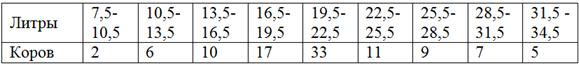

На уровне значимости $0.05$ проверить гипотезу о том, что генеральная совокупность (средний удой коров всей фермы) распределена нормально.
#### Решение
#### Проверка

In [37]:
# YOUR CODE HERE

### Задача 3 (самостоятельное решение)
#### Условие
В итоге испытаний $1000$ элементов на время безотказной работы (час.) получено распределение, приведенное в таблице. Требуется при уровне значимости проверить гипотезу о том, что данные в генеральной совокупности распределены по показательному закону.
Время безотказной работы $0-10, 10-20, 20-30, 30-40, 40-50, 50-60, 60-70$
Число отказавших элементов $365, 245, 150, 100, 70, 45, 25$
#### Решение
#### Проверка

In [35]:
# YOUR CODE HERE

## Полезные ссылки
- [Применение критерия Колмогорова — Смирнова для выбора акций на российском фондовом рынке](https://beintrend.ru/2010-05-29-12-24-58)
- [Калькулятор p-value](https://gallery.shinyapps.io/dist_calc/)